In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



SyntaxError: invalid or missing encoding declaration for 'C:\\Users\\Aidan\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\tensorflow\\python\\framework\\importer.py' (<string>)

In [3]:
(x_train, y_train) , ( x_test, y_test) = mnist.load_data()

NameError: name 'mnist' is not defined

In [4]:
x_train4D = x_train.reshape(x_train.shape[0],28,28,1).astype('float32') / 255
x_test4D = x_test.reshape(x_test.shape[0],28,28,1).astype('float32') / 255

NameError: name 'x_train' is not defined

In [5]:
y_trainOneHot = np_utils.to_categorical(y_train)
y_testOneHot = np_utils.to_categorical(y_test)

NameError: name 'np_utils' is not defined

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

Using TensorFlow backend.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



SyntaxError: invalid or missing encoding declaration for 'C:\\Users\\Aidan\\Anaconda3\\envs\\tensorflow\\lib\\site-packages\\tensorflow\\python\\framework\\importer.py' (<string>)

In [6]:
model = Sequential()

In [7]:
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))

In [8]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [9]:
model.add(Conv2D(filters=36, kernel_size=(5,5), padding='same', input_shape=(28,28,1), activation='relu'))

In [10]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
model.add(Dropout(0.25))

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(128, activation='relu'))

In [14]:
model.add(Dropout(0.5))

In [15]:
model.add(Dense(10,activation='softmax'))

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               225920    
__________

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [18]:
train_history=model.fit(x=x_train4D,y=y_trainOneHot,validation_split=0.2,epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 31s - loss: 0.4897 - acc: 0.8472 - val_loss: 0.0972 - val_acc: 0.9719
Epoch 2/10
 - 31s - loss: 0.1418 - acc: 0.9582 - val_loss: 0.0636 - val_acc: 0.9805
Epoch 3/10
 - 31s - loss: 0.1030 - acc: 0.9694 - val_loss: 0.0525 - val_acc: 0.9833
Epoch 4/10
 - 31s - loss: 0.0845 - acc: 0.9749 - val_loss: 0.0458 - val_acc: 0.9856
Epoch 5/10
 - 31s - loss: 0.0725 - acc: 0.9779 - val_loss: 0.0388 - val_acc: 0.9878
Epoch 6/10
 - 31s - loss: 0.0639 - acc: 0.9807 - val_loss: 0.0383 - val_acc: 0.9885
Epoch 7/10
 - 31s - loss: 0.0565 - acc: 0.9828 - val_loss: 0.0427 - val_acc: 0.9865
Epoch 8/10
 - 31s - loss: 0.0512 - acc: 0.9839 - val_loss: 0.0334 - val_acc: 0.9899
Epoch 9/10
 - 31s - loss: 0.0449 - acc: 0.9867 - val_loss: 0.0332 - val_acc: 0.9903
Epoch 10/10
 - 31s - loss: 0.0427 - acc: 0.9868 - val_loss: 0.0331 - val_acc: 0.9902


In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

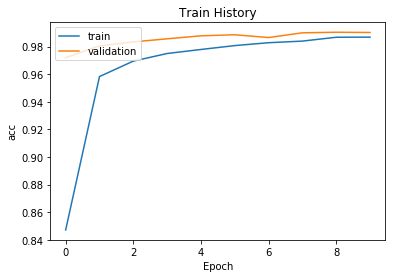

In [20]:
show_train_history(train_history,'acc', 'val_acc')

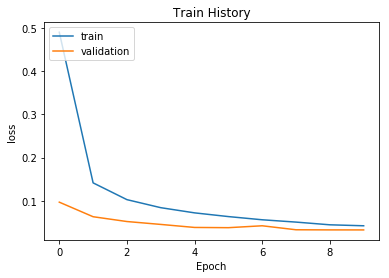

In [21]:
show_train_history(train_history,'loss', 'val_loss')

In [22]:
scores = model.evaluate(x_test4D,y_testOneHot)
scores[1]

10000/10000 [==============================] - 3s 293us/step


0.9913

In [23]:
prediction=model.predict_classes(x_test4D)

In [24]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

In [25]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num =10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25: num=25
    for i in range(0, num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx+i],cmap='binary')
        title="label=" + str(labels[idx+i])
        if len(prediction)>0:
            title +=', predict=' + str(prediction[idx+i])
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

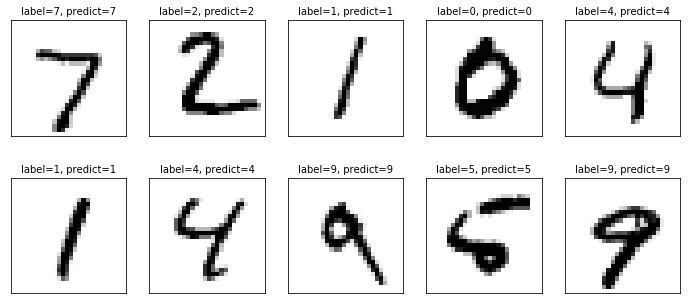

In [26]:
plot_images_labels_prediction(x_test,y_test, prediction,idx=0)

In [37]:
import pandas as pd
pd.crosstab(y_test, prediction, rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,0,0,0,0,0,1,1,1,0
1,0,1133,1,0,0,1,0,0,0,0
2,1,0,1029,0,0,0,0,2,0,0
3,0,0,2,1000,0,3,0,3,2,0
4,0,0,0,0,976,0,0,1,1,4
5,1,0,0,4,0,886,1,0,0,0
6,5,2,0,1,2,3,944,0,1,0
7,0,1,4,1,0,0,0,1021,1,0
8,3,1,5,1,0,2,0,4,954,4


array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 